# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv('drug.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<AxesSubplot:>

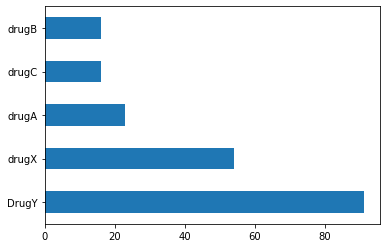

In [4]:
df['Drug'].value_counts().plot(kind='barh')

# Data Processing

In [5]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['Sex'] = lb.fit_transform(df['Sex'])

In [6]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['BP'] = Le.fit_transform(df['BP'])
df['Cholesterol'] = Le.fit_transform(df['Cholesterol'])
df['Drug'] = Le.fit_transform(df['Drug'])

In [7]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [8]:
features = df.drop('Drug',axis=1)
Label = df['Drug']
features

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [9]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


<AxesSubplot:>

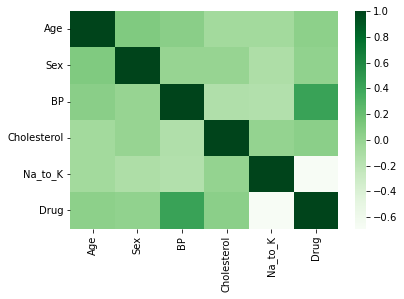

In [10]:
sns.heatmap(df.corr(),cmap="Greens")

# Splitting Data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,Label,random_state=42,test_size=0.7)

# Applying Different Classification Algorithms to identify which algo provide the best performance

## Logistice Regression

In [12]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

E:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred = Lr.predict(x_test)

In [14]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4]), array([32,  4,  3,  6, 15], dtype=int64))

In [15]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score*100

80.0

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        59
           1       0.69      0.47      0.56        19
           2       1.00      0.46      0.63        13
           3       0.75      0.30      0.43        10
           4       0.88      0.95      0.91        39

    accuracy                           0.80       140
   macro avg       0.82      0.63      0.68       140
weighted avg       0.81      0.80      0.78       140



## KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=5)
KNC.fit(x_train, y_train)
KNC_y_pred = KNC.predict(x_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,KNC_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        59
           1       0.33      0.16      0.21        19
           2       0.50      0.31      0.38        13
           3       0.00      0.00      0.00        10
           4       0.40      0.49      0.44        39

    accuracy                           0.58       140
   macro avg       0.41      0.38      0.38       140
weighted avg       0.54      0.58      0.55       140



## Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
DiciTre = DecisionTreeClassifier(max_leaf_nodes=20)
DiciTre.fit(x_train, y_train)
DiciTre_y_pred = DiciTre.predict(x_test)

In [20]:
print(classification_report(y_test, DiciTre_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.86      1.00      0.93        19
           2       1.00      0.77      0.87        13
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        39

    accuracy                           0.98       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.98      0.98      0.98       140



## Random Forest Classifier 

In [21]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_leaf_nodes=30)
RFC.fit(x_train, y_train)
RFC_y_pred = RFC.predict(x_test)

In [22]:
print(classification_report(y_test, RFC_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.83      1.00      0.90        19
           2       1.00      0.69      0.82        13
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        39

    accuracy                           0.97       140
   macro avg       0.97      0.94      0.94       140
weighted avg       0.98      0.97      0.97       140

